# Bootes master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))
import datetime
print("This notebook was executed on: \n{}".format(datetime.datetime.now()))

This notebook was run with herschelhelp_internal version: 
0246c5d (Thu Jan 25 17:01:47 2018 +0000) [with local modifications]
This notebook was executed on: 
2018-02-15 19:43:22.825596


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.style.use('ggplot')

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
from astropy import visualization as vis
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import (nb_compare_mags, nb_ccplots, nb_histograms, find_last_ml_suffix,
                                              quick_checks)

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
SUFFIX = find_last_ml_suffix()
#SUFFIX = "20171016"

master_catalogue_filename = "master_catalogue_bootes_{}.fits".format(SUFFIX)
master_catalogue = Table.read("{}/{}".format(OUT_DIR, master_catalogue_filename))

print("Diagnostics done using: {}".format(master_catalogue_filename))

Diagnostics done using: master_catalogue_bootes_20180215.fits


## 0 - Quick checks

In [4]:
quick_checks(master_catalogue).show_in_notebook()

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(192, False) will return an array of dtype('bool')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)
/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/numpy/core/numeric.py:301: FutureWarning: in the future, full(192, 0) will return an array of dtype('int64')
  format(shape, fill_value, array(fill_value).dtype), FutureWarning)


Table shows only problematic columns.


## I - Summary of wavelength domains

In [5]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

/opt/anaconda3/envs/herschelhelp_internal/lib/python3.6/site-packages/matplotlib_venn/_venn3.py:117: UserWarning: Bad circle positioning
  warnings.warn("Bad circle positioning")


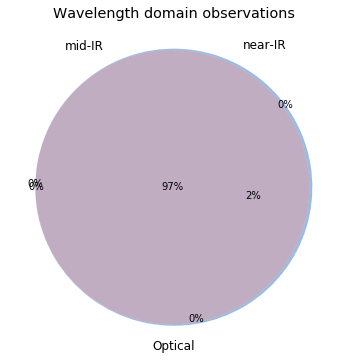

In [6]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

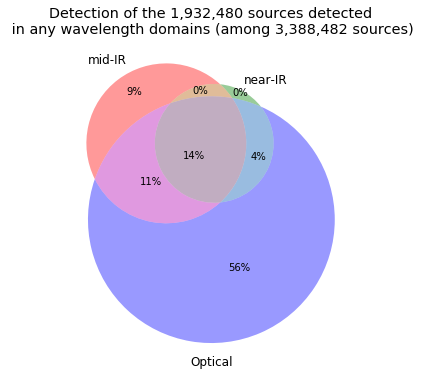

In [7]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [8]:
u_bands = []
g_bands = ["GPC1 g", "DECam g", "BASS g"]
r_bands = ["GPC1 r", "DECam r", "BASS r", "Mosaic r"]
i_bands = ["GPC1 i",                      "Mosaic i"]
z_bands = ["GPC1 z", "DECam z", "BASS z",            "90prime z"]
y_bands = ["GPC1 y"]

j_bands = ["Newfirm j", "UKIDSS J"]
h_bands = ["Newfirm h"]
k_bands = ["Newfirm k",                   "Mosaic k"]

### II.a - Comparing depths

We compare the histograms of the total aperture magnitudes of similar bands.

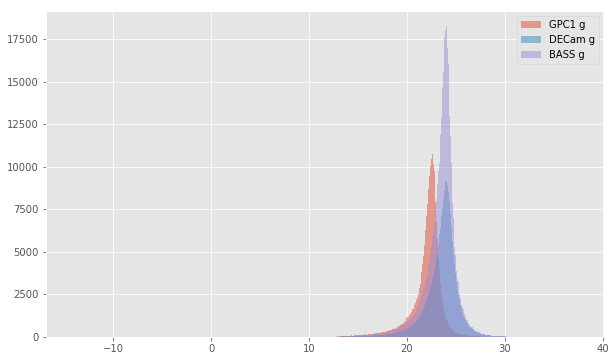

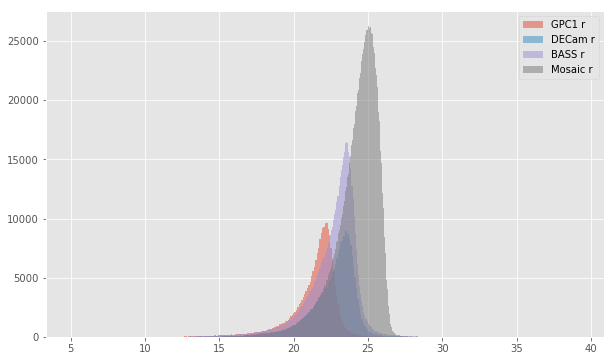

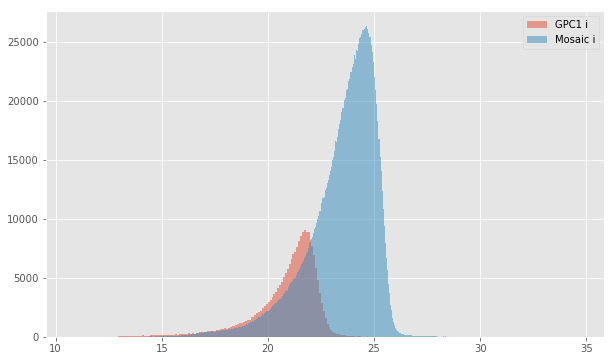

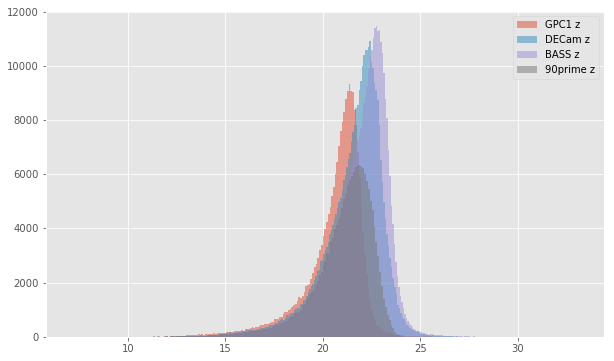

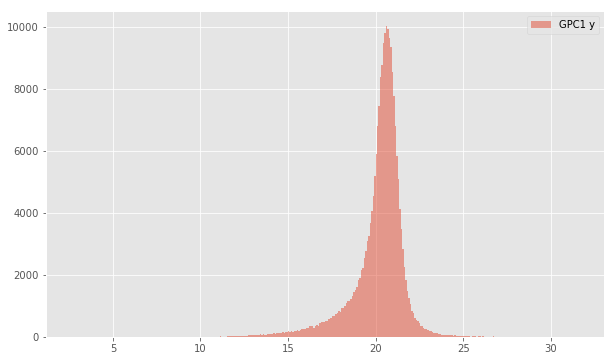

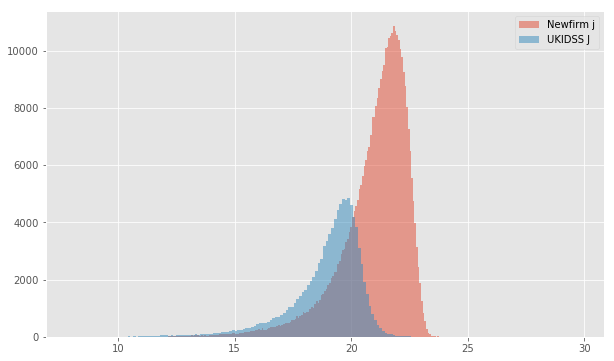

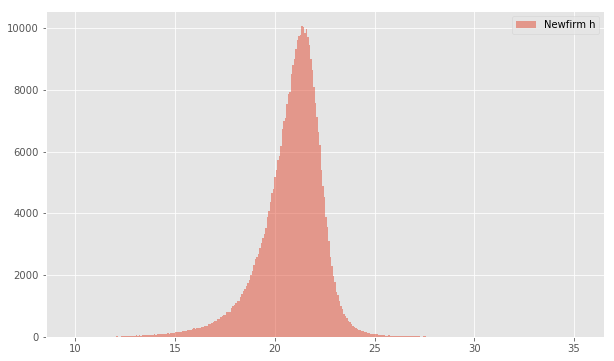

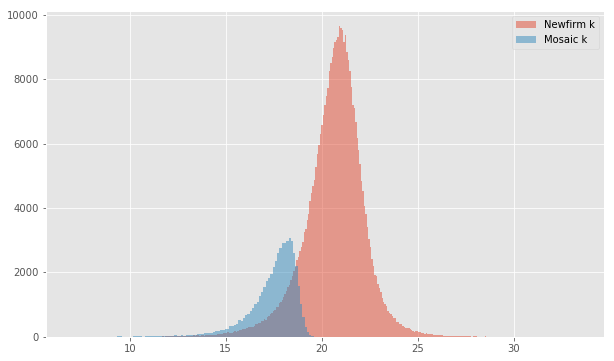

In [9]:
for bands in [g_bands, r_bands, i_bands, z_bands, y_bands, j_bands, h_bands, k_bands]:
    colnames = ["m_{}".format(band.replace(" ", "_").lower()) for band in bands]
    nb_histograms(master_catalogue, colnames, bands)

### II.b - Comparing magnitudes

We compare one to one each magnitude in similar bands.

DECam g (aperture) - GPC1 g (aperture):
- Median: 0.11
- Median Absolute Deviation: 0.27
- 1% percentile: -2.129623432159424
- 99% percentile: 3.1636921691894475


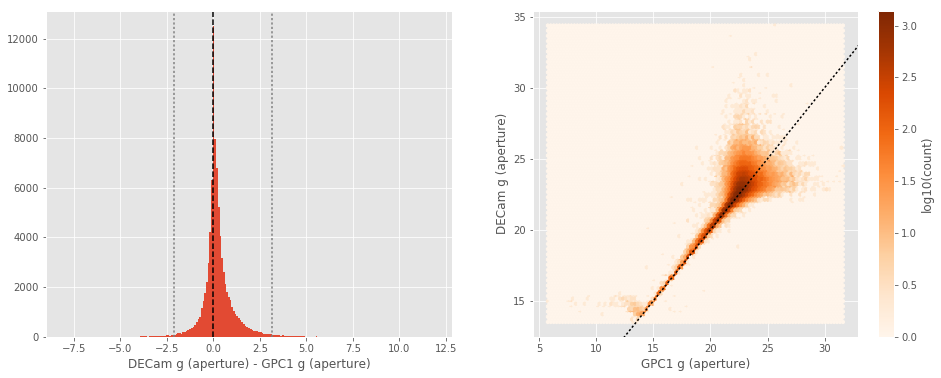

DECam g (total) - GPC1 g (total):
- Median: 0.03
- Median Absolute Deviation: 0.27
- 1% percentile: -1.5935642242431642
- 99% percentile: 3.554932403564457


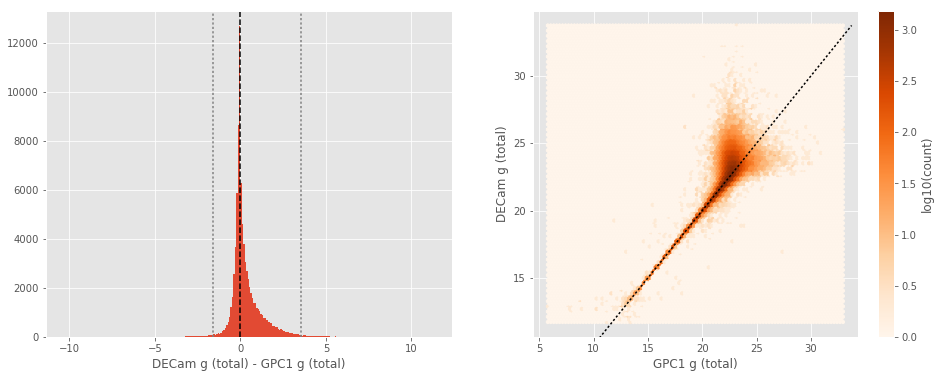

BASS g (aperture) - GPC1 g (aperture):
- Median: 0.13
- Median Absolute Deviation: 0.27
- 1% percentile: -2.1558848571777345
- 99% percentile: 3.624149322509765


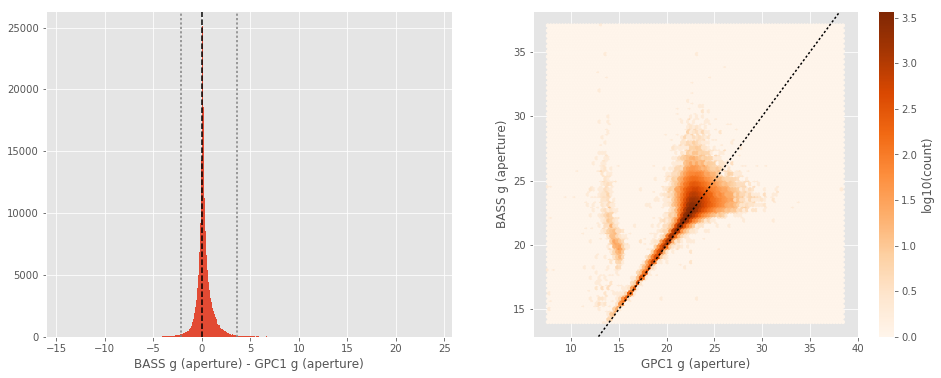

BASS g (total) - GPC1 g (total):
- Median: 0.01
- Median Absolute Deviation: 0.27
- 1% percentile: -1.7584948539733887
- 99% percentile: 3.16856803894043


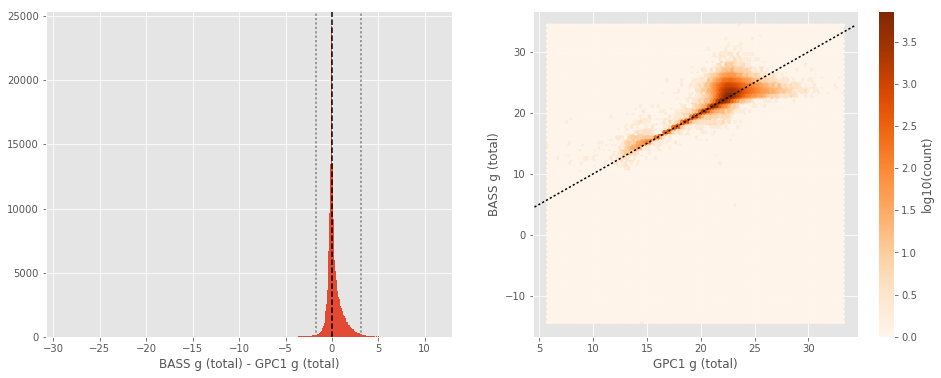

BASS g (aperture) - DECam g (aperture):
- Median: 0.01
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9024787902832032
- 99% percentile: 1.915562438964841


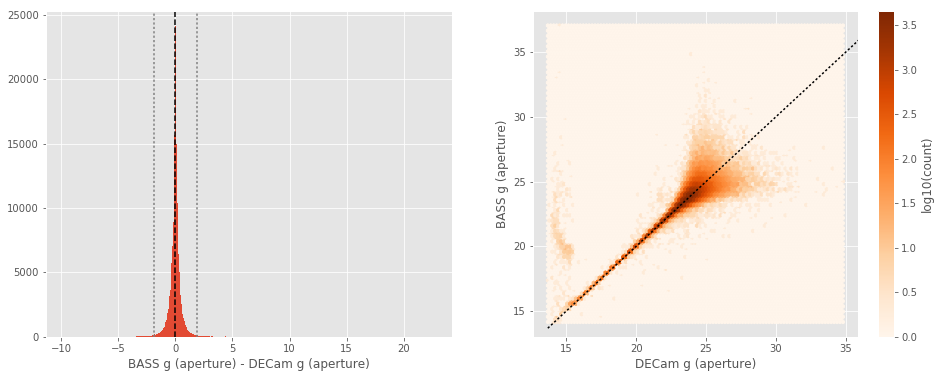

BASS g (total) - DECam g (total):
- Median: -0.08
- Median Absolute Deviation: 0.18
- 1% percentile: -2.300769805908203
- 99% percentile: 1.2545394897460938


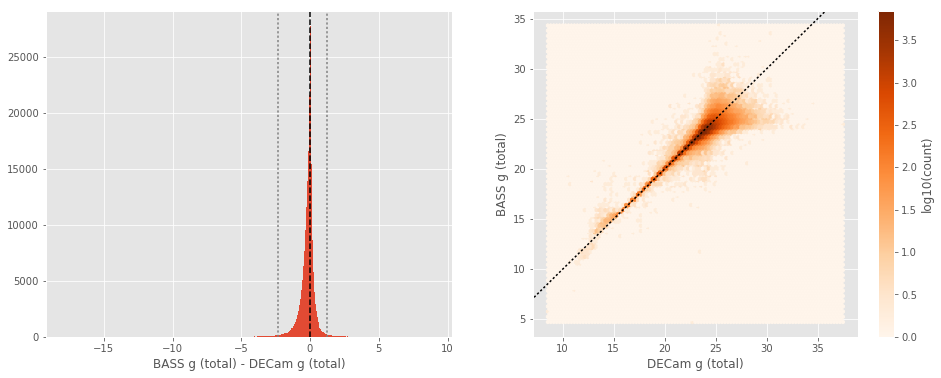

DECam r (aperture) - GPC1 r (aperture):
- Median: -0.07
- Median Absolute Deviation: 0.18
- 1% percentile: -1.7460657501220702
- 99% percentile: 1.5504988861083981


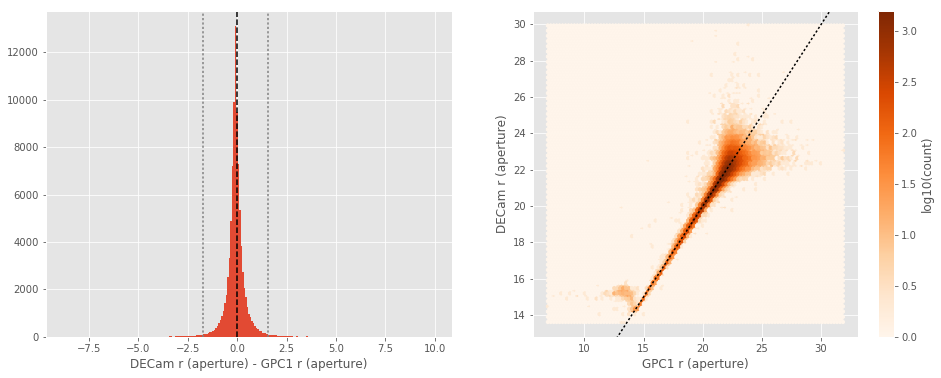

DECam r (total) - GPC1 r (total):
- Median: -0.17
- Median Absolute Deviation: 0.16
- 1% percentile: -1.3463243865966796
- 99% percentile: 1.5266695404052713


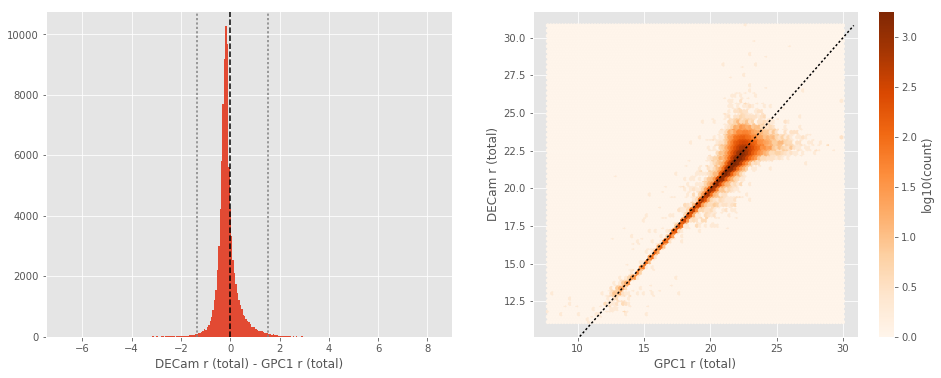

BASS r (aperture) - GPC1 r (aperture):
- Median: 0.01
- Median Absolute Deviation: 0.19
- 1% percentile: -1.6478734016418457
- 99% percentile: 2.0846044635772616


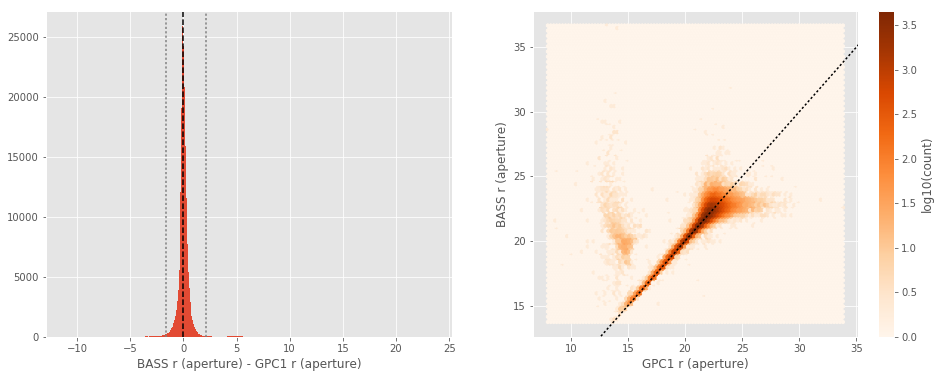

BASS r (total) - GPC1 r (total):
- Median: -0.16
- Median Absolute Deviation: 0.15
- 1% percentile: -1.4110986709594726
- 99% percentile: 1.466648483276367


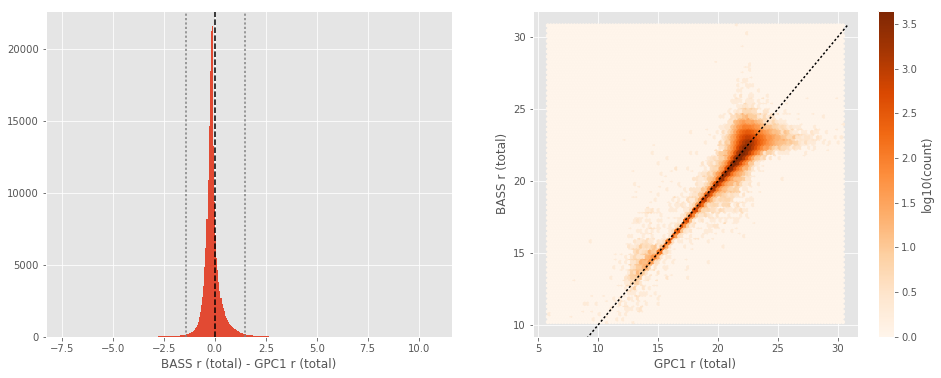

Mosaic r (aperture) - GPC1 r (aperture):
- Median: 0.32
- Median Absolute Deviation: 0.30
- 1% percentile: -1.5543725476989732
- 99% percentile: 1.9533455380248914


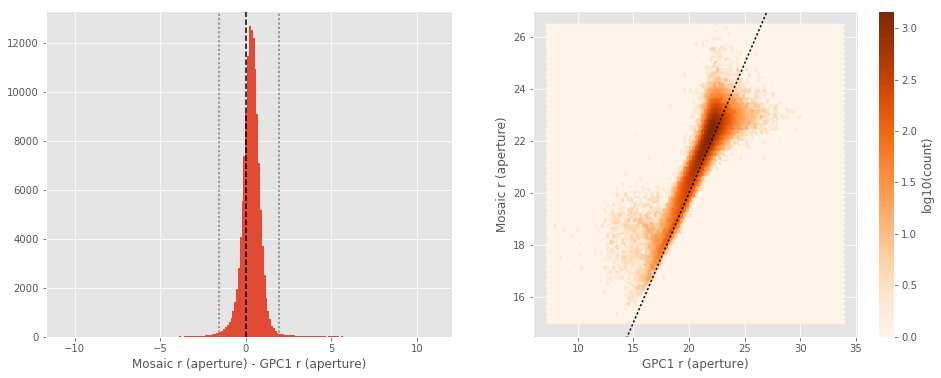

Mosaic r (total) - GPC1 r (total):
- Median: -0.42
- Median Absolute Deviation: 0.18
- 1% percentile: -1.9438456686096197
- 99% percentile: 1.3285997677612298


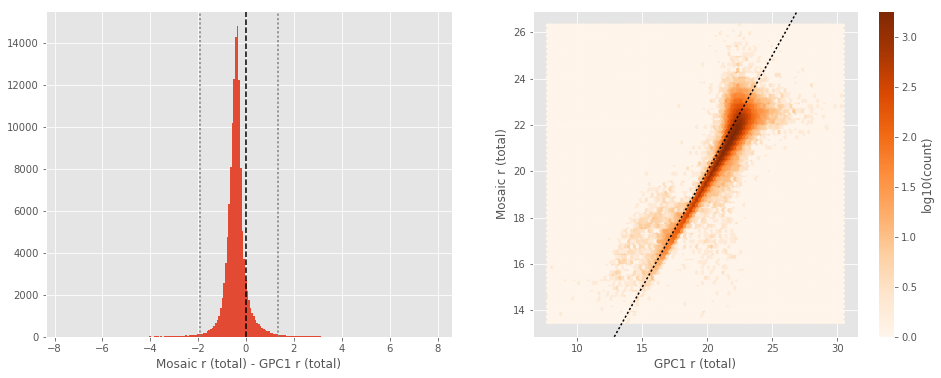

BASS r (aperture) - DECam r (aperture):
- Median: 0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3027259826660156
- 99% percentile: 1.7100755310058595


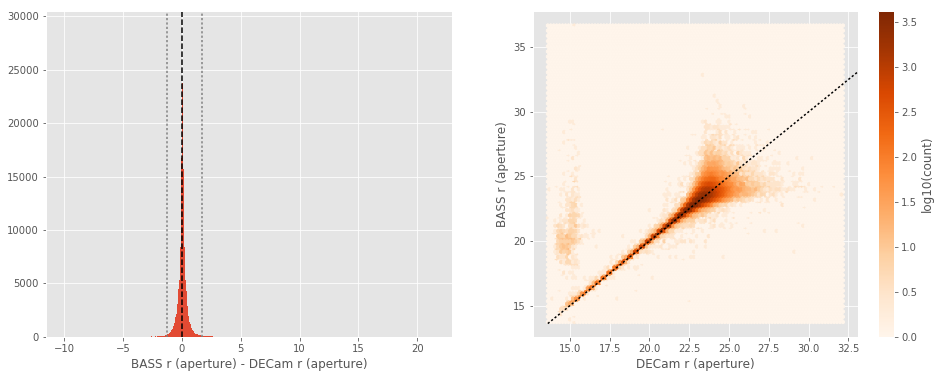

BASS r (total) - DECam r (total):
- Median: -0.00
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2540557861328123
- 99% percentile: 0.9731430053710977


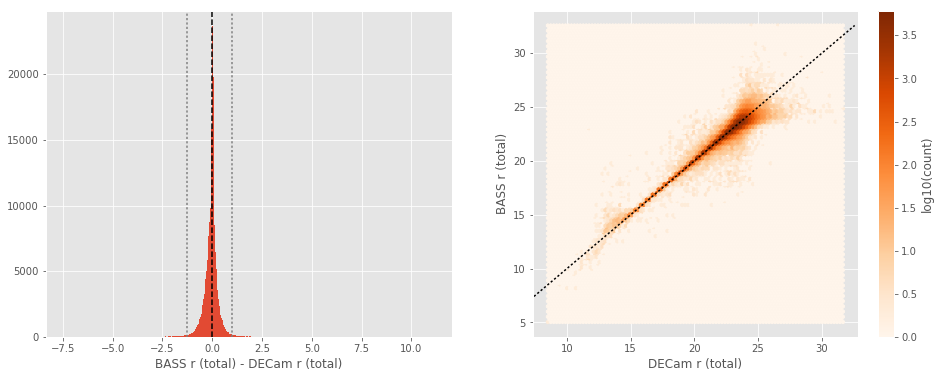

Mosaic r (aperture) - DECam r (aperture):
- Median: 0.34
- Median Absolute Deviation: 0.23
- 1% percentile: -1.273856057128907
- 99% percentile: 1.1829542102050776


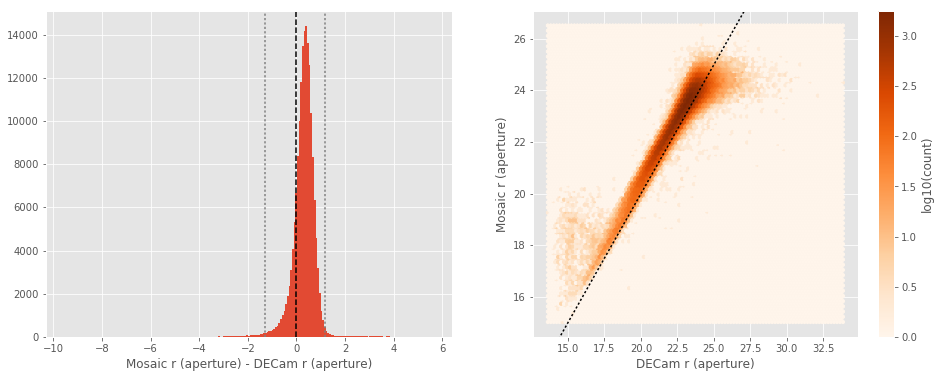

Mosaic r (total) - DECam r (total):
- Median: -0.31
- Median Absolute Deviation: 0.16
- 1% percentile: -1.9626963769531256
- 99% percentile: 0.5849587255859365


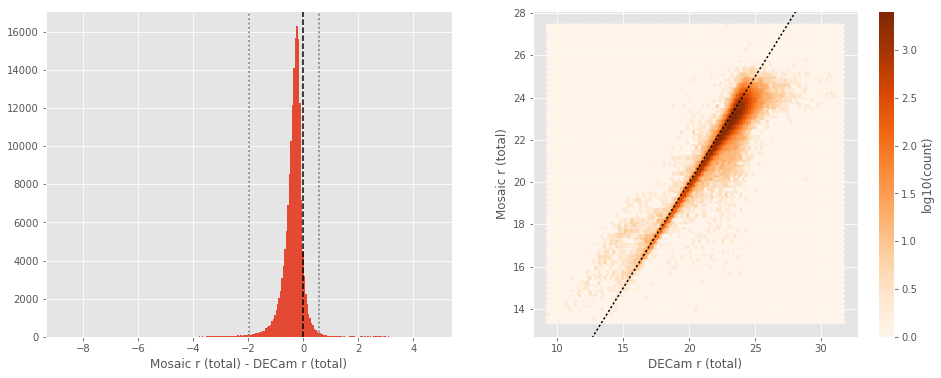

Mosaic r (aperture) - BASS r (aperture):
- Median: 0.26
- Median Absolute Deviation: 0.24
- 1% percentile: -1.5048314084472654
- 99% percentile: 1.1905264020996087


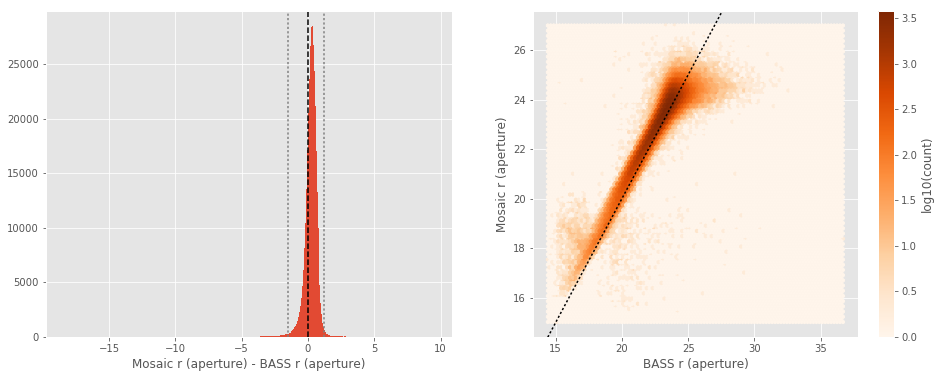

Mosaic r (total) - BASS r (total):
- Median: -0.29
- Median Absolute Deviation: 0.16
- 1% percentile: -1.9414329913330073
- 99% percentile: 0.7985939500732392


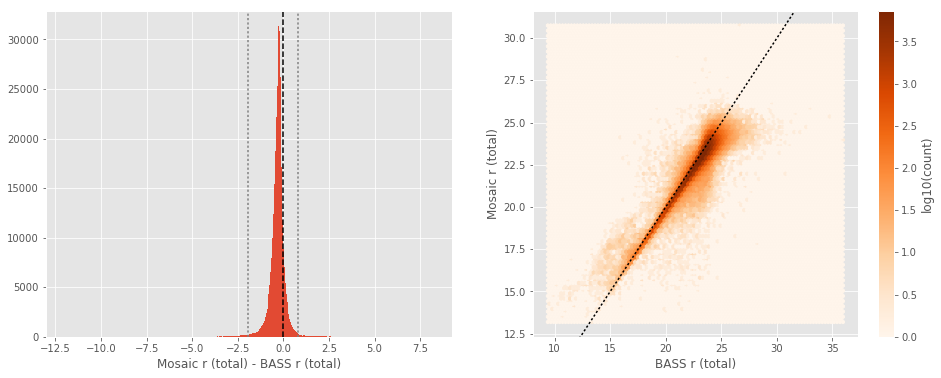

Mosaic i (aperture) - GPC1 i (aperture):
- Median: 0.05
- Median Absolute Deviation: 0.22
- 1% percentile: -0.8175293390808115
- 99% percentile: 1.5236310905456432


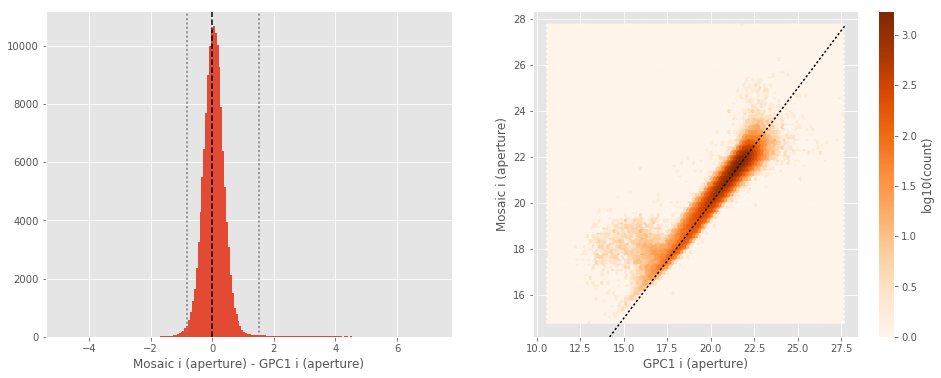

Mosaic i (total) - GPC1 i (total):
- Median: -0.70
- Median Absolute Deviation: 0.13
- 1% percentile: -2.8845257424011237
- 99% percentile: 0.5245688302917544


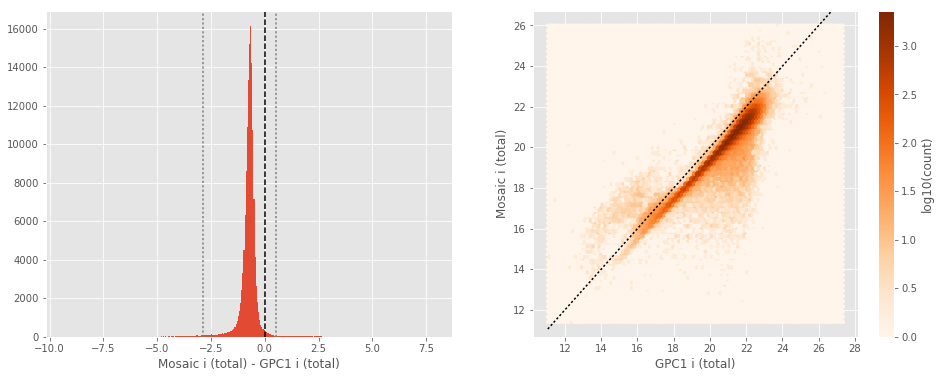

DECam z (aperture) - GPC1 z (aperture):
- Median: -0.13
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2986002159118653
- 99% percentile: 1.5465093803405685


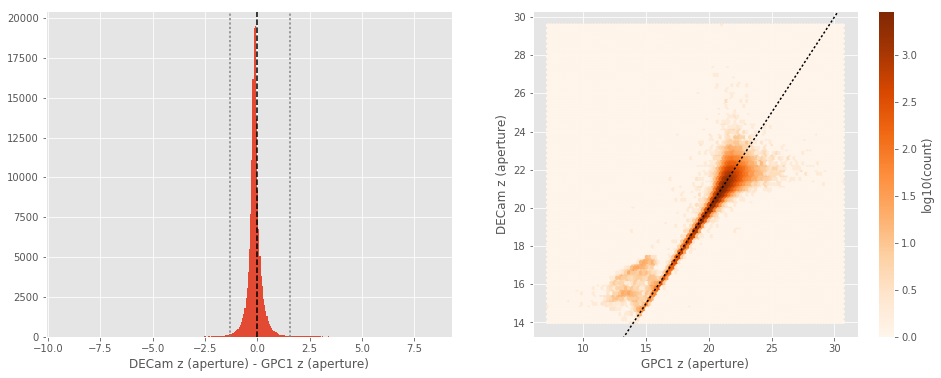

DECam z (total) - GPC1 z (total):
- Median: -0.25
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3092887878417967
- 99% percentile: 0.9159954833984361


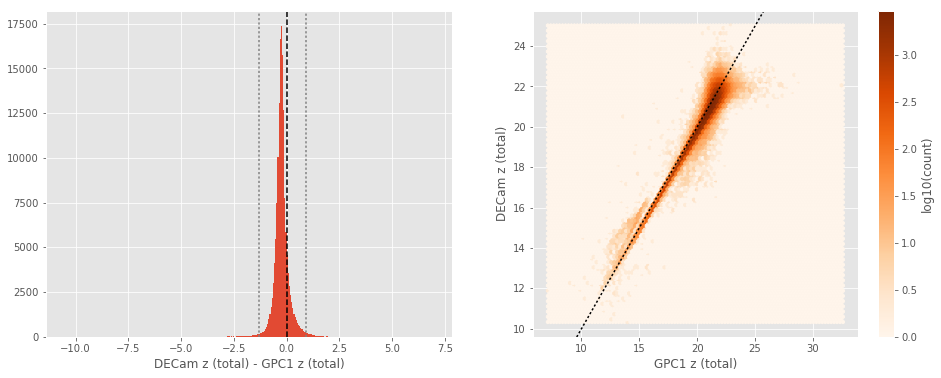

BASS z (aperture) - GPC1 z (aperture):
- Median: -0.10
- Median Absolute Deviation: 0.14
- 1% percentile: -1.2721107482910157
- 99% percentile: 2.941773223876948


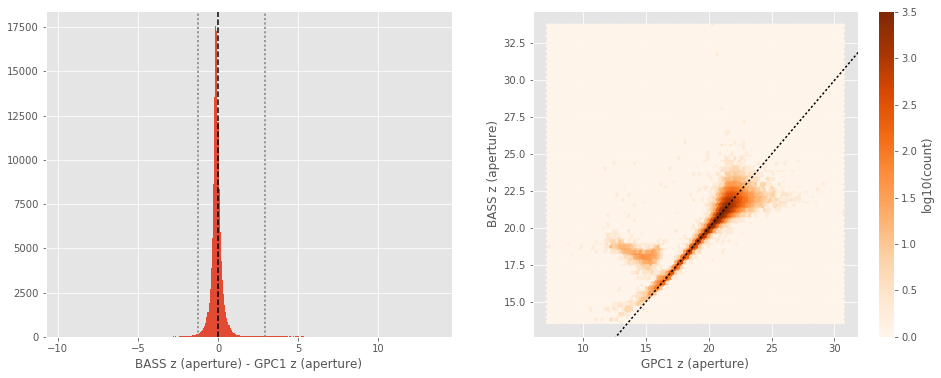

BASS z (total) - GPC1 z (total):
- Median: -0.28
- Median Absolute Deviation: 0.14
- 1% percentile: -1.3286592864990234
- 99% percentile: 0.979087142944336


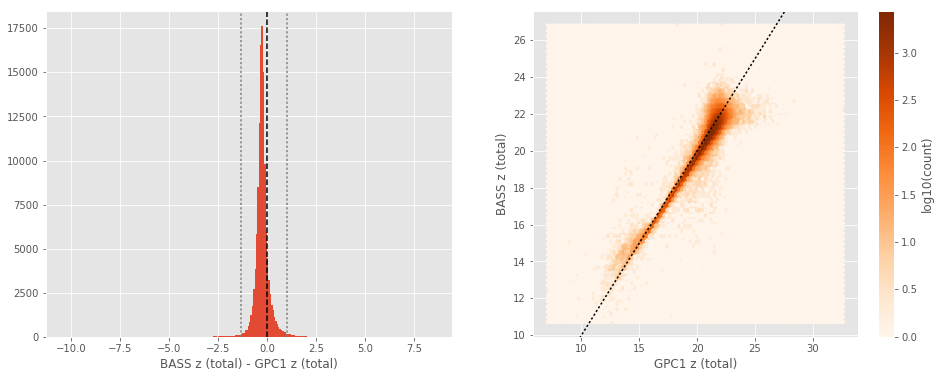

90prime z (aperture) - GPC1 z (aperture):
- Median: 0.80
- Median Absolute Deviation: 0.23
- 1% percentile: -0.4319049835205077
- 99% percentile: 1.6812530517578144


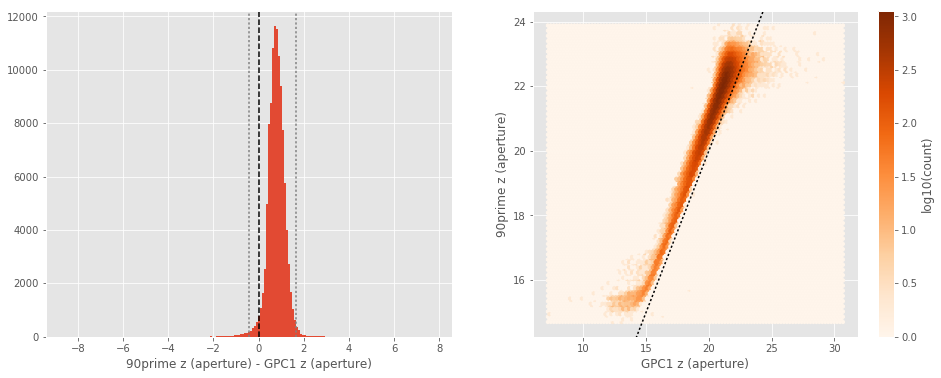

90prime z (total) - GPC1 z (total):
- Median: -0.20
- Median Absolute Deviation: 0.13
- 1% percentile: -1.2456630325317384
- 99% percentile: 0.7505001258850097


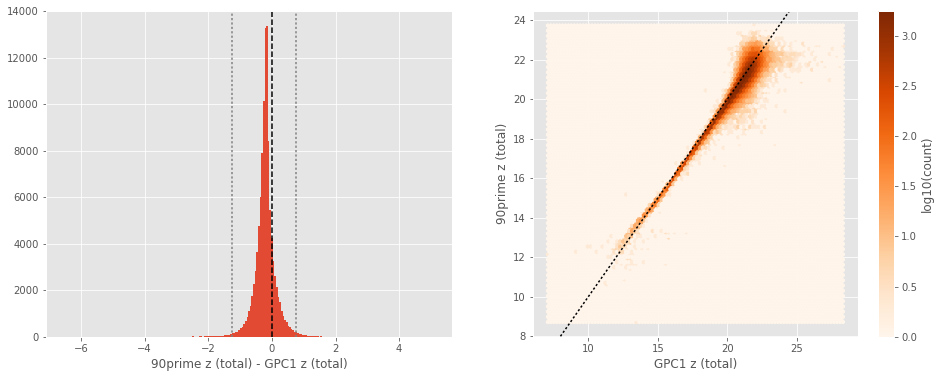

BASS z (aperture) - DECam z (aperture):
- Median: 0.00
- Median Absolute Deviation: 0.15
- 1% percentile: -1.6738953399658203
- 99% percentile: 2.337906265258781


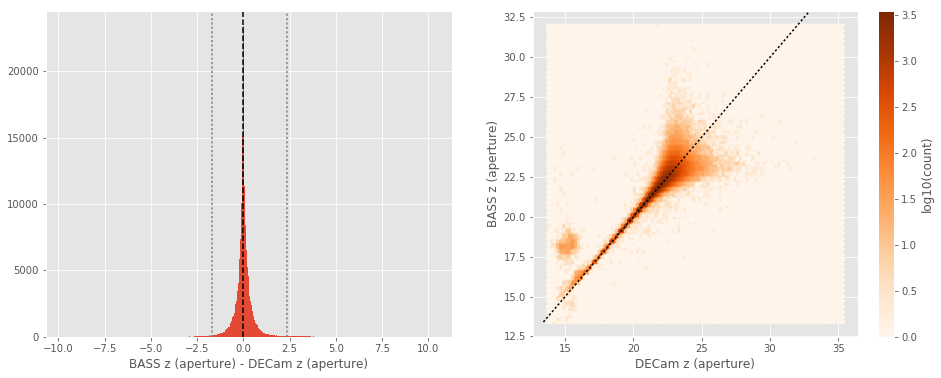

BASS z (total) - DECam z (total):
- Median: -0.03
- Median Absolute Deviation: 0.14
- 1% percentile: -1.4096139526367186
- 99% percentile: 0.9663287353515624


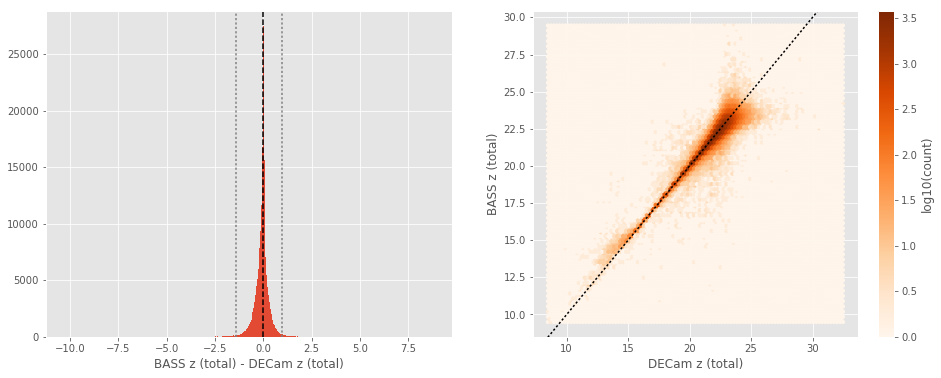

90prime z (aperture) - DECam z (aperture):
- Median: 0.89
- Median Absolute Deviation: 0.19
- 1% percentile: -0.3958616638183594
- 99% percentile: 1.4888987731933594


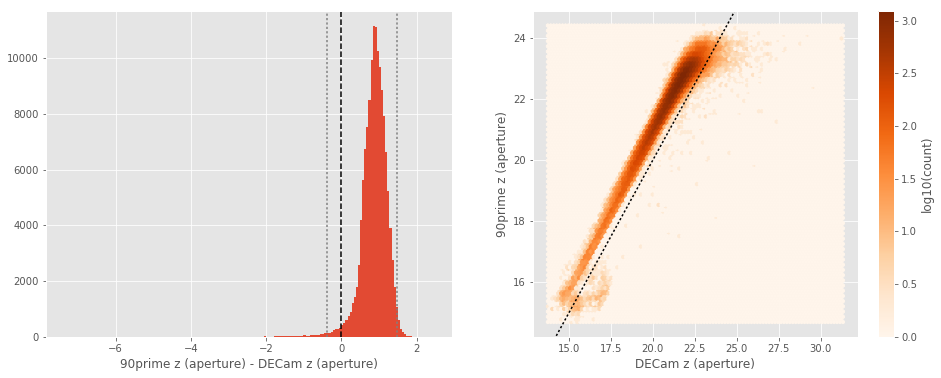

90prime z (total) - DECam z (total):
- Median: 0.06
- Median Absolute Deviation: 0.14
- 1% percentile: -1.1099947547912596
- 99% percentile: 0.7794004440307619


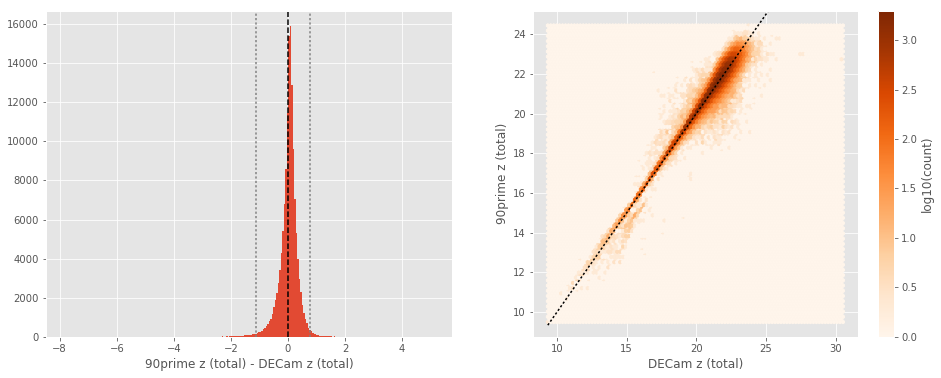

90prime z (aperture) - BASS z (aperture):
- Median: 0.85
- Median Absolute Deviation: 0.20
- 1% percentile: -1.3515699005126953
- 99% percentile: 1.4727325248718264


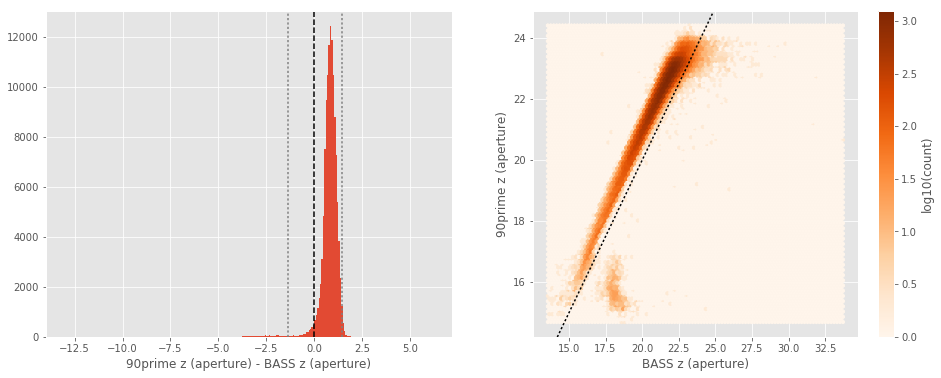

90prime z (total) - BASS z (total):
- Median: 0.09
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1813747787475586
- 99% percentile: 0.8646033096313506


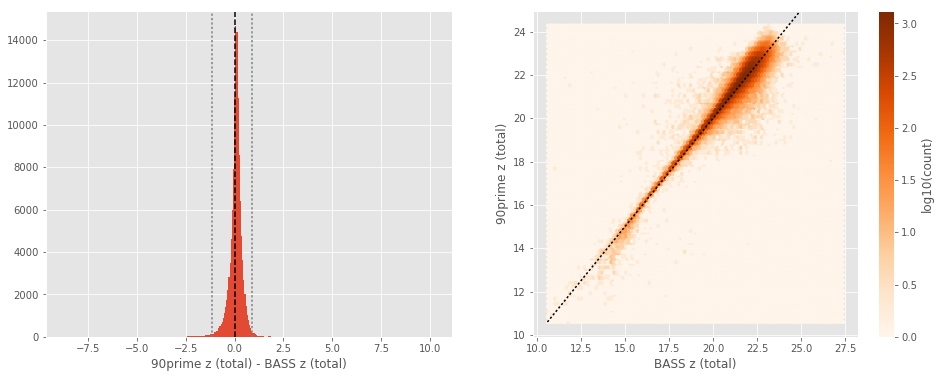

In [10]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [11]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [12]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_Bootes.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

GPC1 g (aperture) - SDSS g (fiberMag):
- Median: -0.55
- Median Absolute Deviation: 0.27
- 1% percentile: -2.6034235382080078
- 99% percentile: 1.6591714096069339


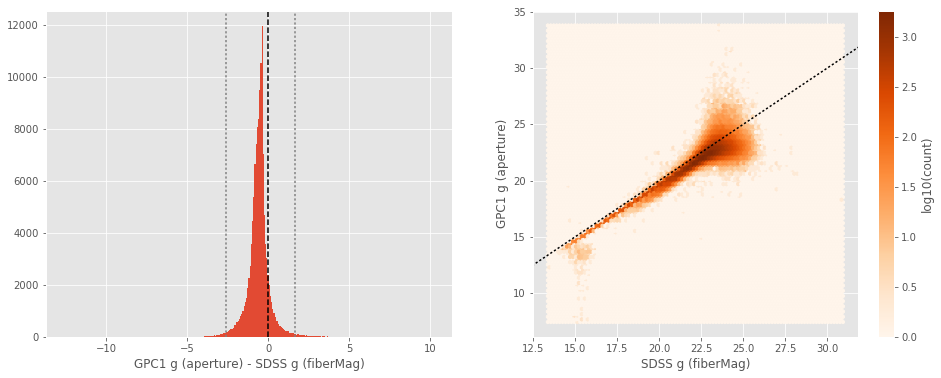

GPC1 g (total) - SDSS g (petroMag):
- Median: -0.07
- Median Absolute Deviation: 0.26
- 1% percentile: -3.896455383300781
- 99% percentile: 1.6326969146728527


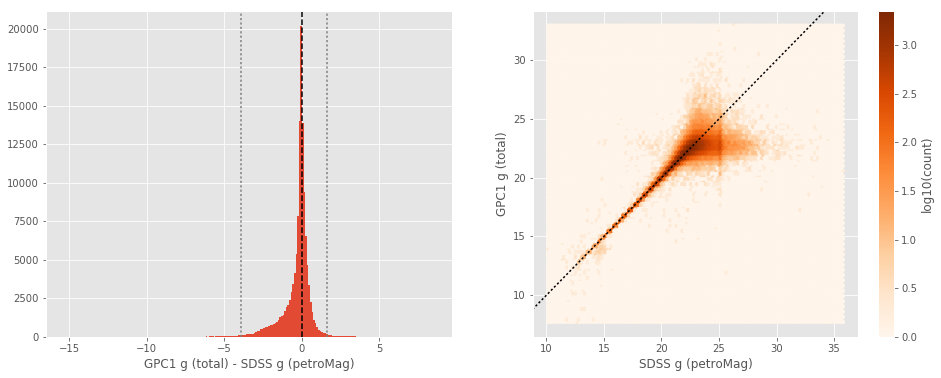

DECam g (aperture) - SDSS g (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.16
- 1% percentile: -1.2159988403320312
- 99% percentile: 1.2765693664550715


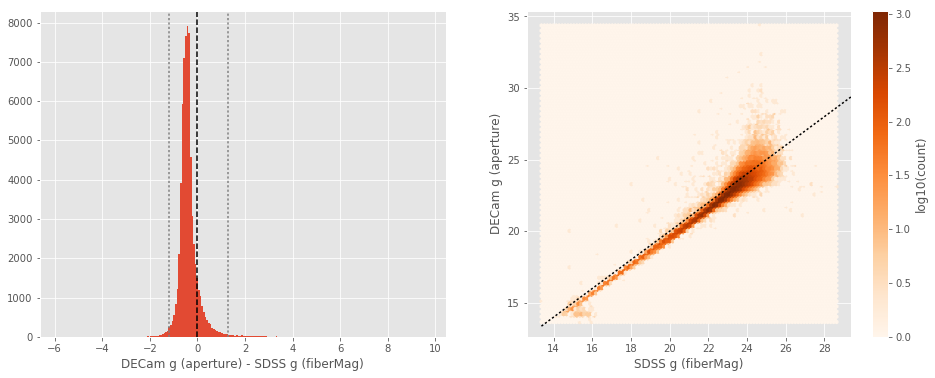

DECam g (total) - SDSS g (petroMag):
- Median: -0.06
- Median Absolute Deviation: 0.24
- 1% percentile: -3.0425405502319336
- 99% percentile: 2.1565788269042834


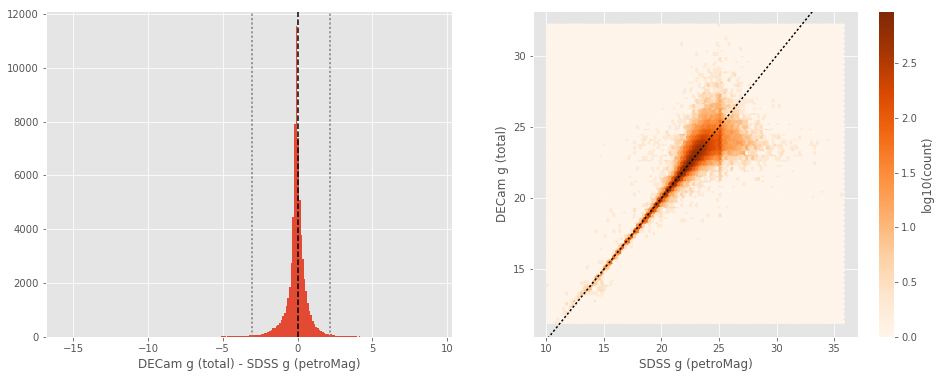

BASS g (aperture) - SDSS g (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.15
- 1% percentile: -1.1409005737304687
- 99% percentile: 1.4991419219971012


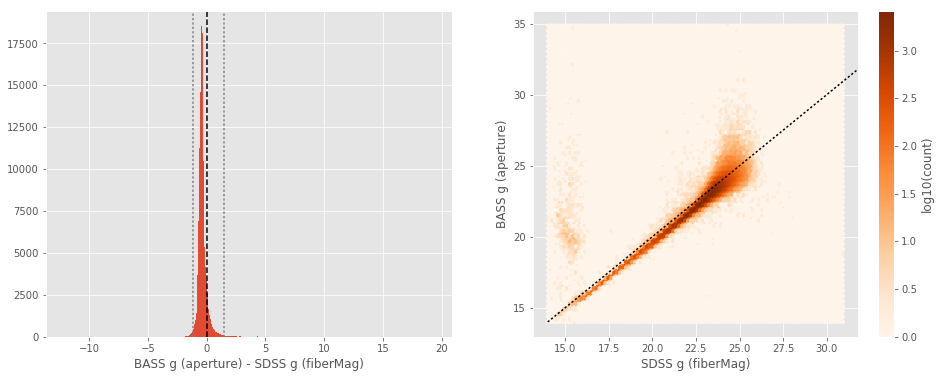

BASS g (total) - SDSS g (petroMag):
- Median: -0.08
- Median Absolute Deviation: 0.22
- 1% percentile: -3.024509620666504
- 99% percentile: 1.7733711624145534


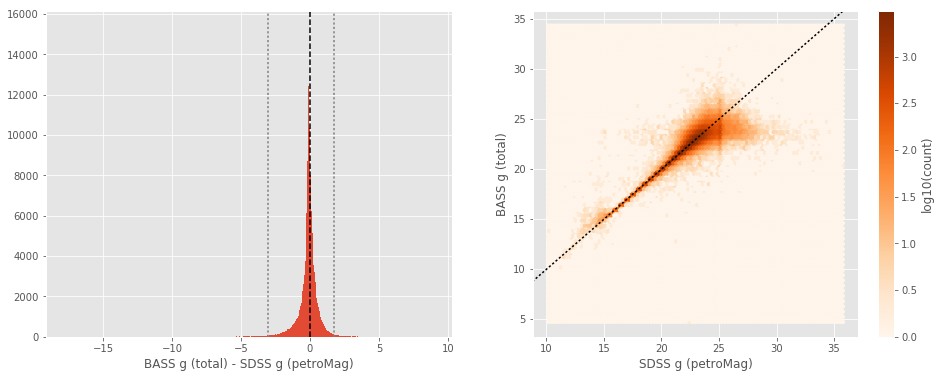

GPC1 r (aperture) - SDSS r (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.18
- 1% percentile: -1.6361807250976563
- 99% percentile: 0.9835488510131456


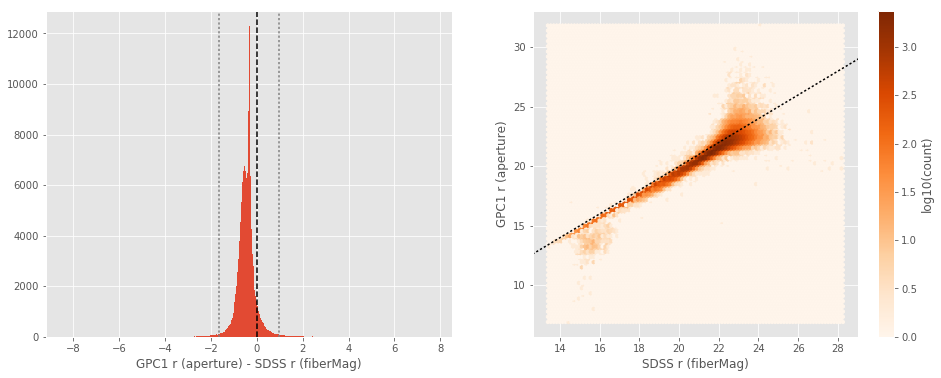

GPC1 r (total) - SDSS r (petroMag):
- Median: 0.03
- Median Absolute Deviation: 0.15
- 1% percentile: -2.361153564453125
- 99% percentile: 1.1698699951171851


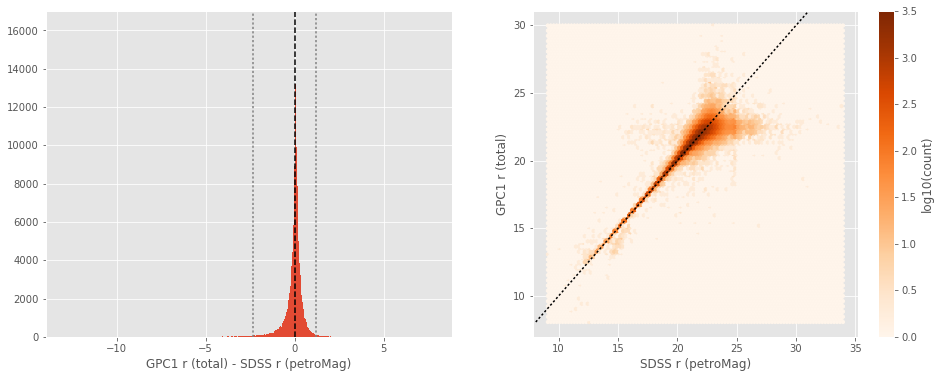

DECam r (aperture) - SDSS r (fiberMag):
- Median: -0.54
- Median Absolute Deviation: 0.12
- 1% percentile: -1.1768863677978516
- 99% percentile: 0.41126976013183597


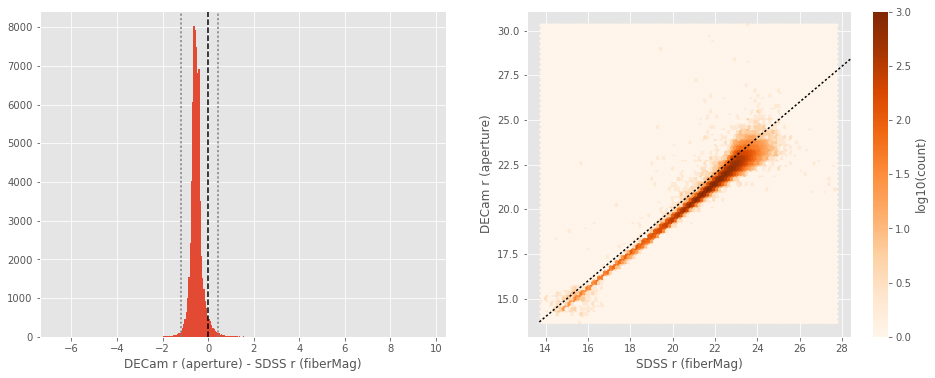

DECam r (total) - SDSS r (petroMag):
- Median: -0.15
- Median Absolute Deviation: 0.16
- 1% percentile: -2.5785251617431637
- 99% percentile: 1.1210886001586942


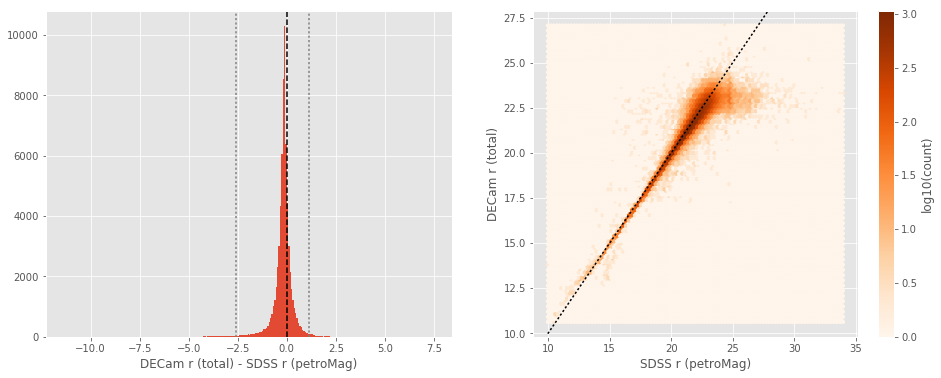

BASS r (aperture) - SDSS r (fiberMag):
- Median: -0.45
- Median Absolute Deviation: 0.14
- 1% percentile: -1.0858132362365722
- 99% percentile: 0.7321663665771609


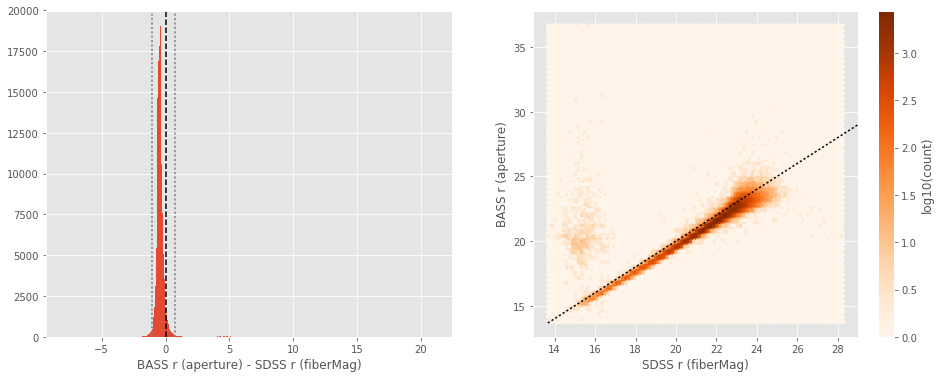

BASS r (total) - SDSS r (petroMag):
- Median: -0.14
- Median Absolute Deviation: 0.15
- 1% percentile: -2.7322116088867188
- 99% percentile: 1.1080004882812462


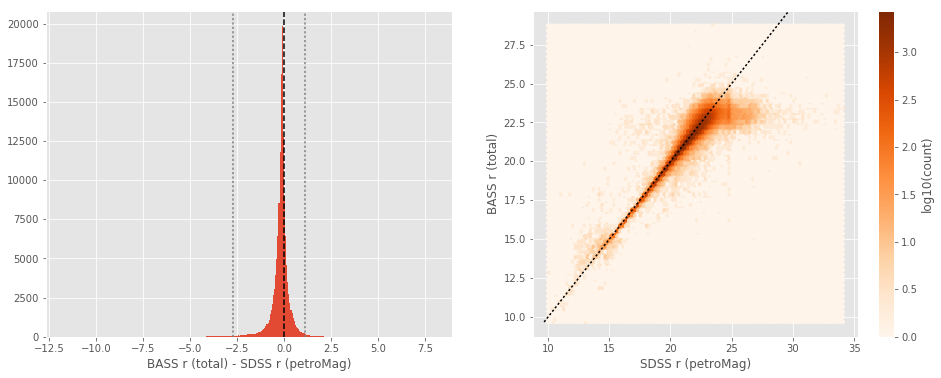

Mosaic r (aperture) - SDSS r (fiberMag):
- Median: -0.14
- Median Absolute Deviation: 0.17
- 1% percentile: -0.9998389564514172
- 99% percentile: 0.9589054608154217


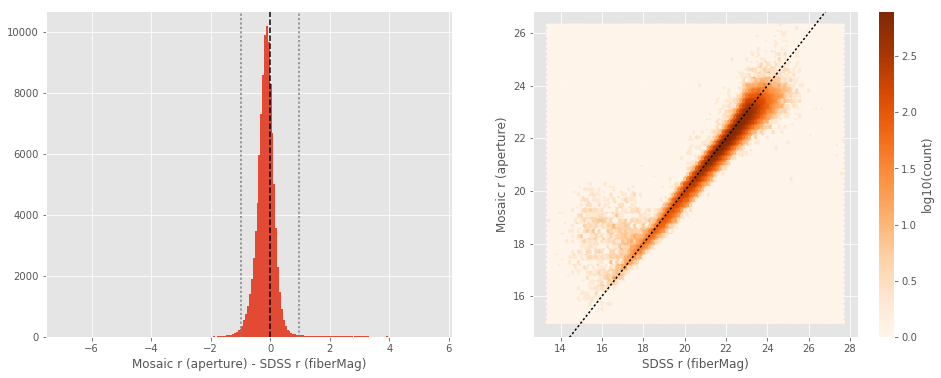

Mosaic r (total) - SDSS r (petroMag):
- Median: -0.39
- Median Absolute Deviation: 0.19
- 1% percentile: -3.2797517349243166
- 99% percentile: 1.0121476103210338


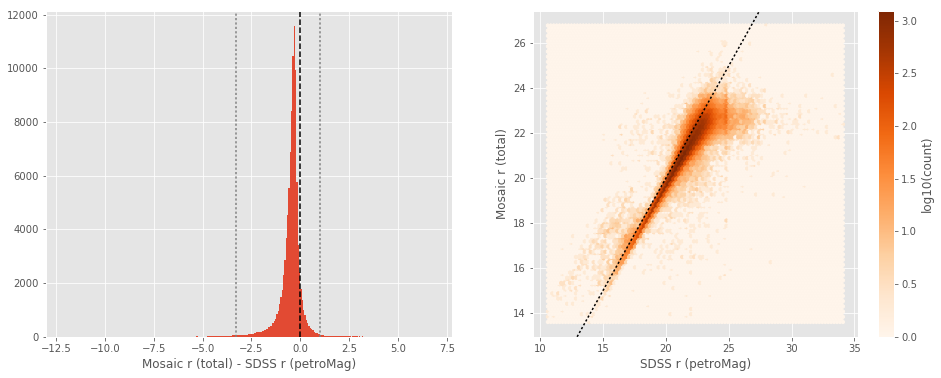

GPC1 i (aperture) - SDSS i (fiberMag):
- Median: -0.41
- Median Absolute Deviation: 0.11
- 1% percentile: -0.9914297962188721
- 99% percentile: 0.2297468376159671


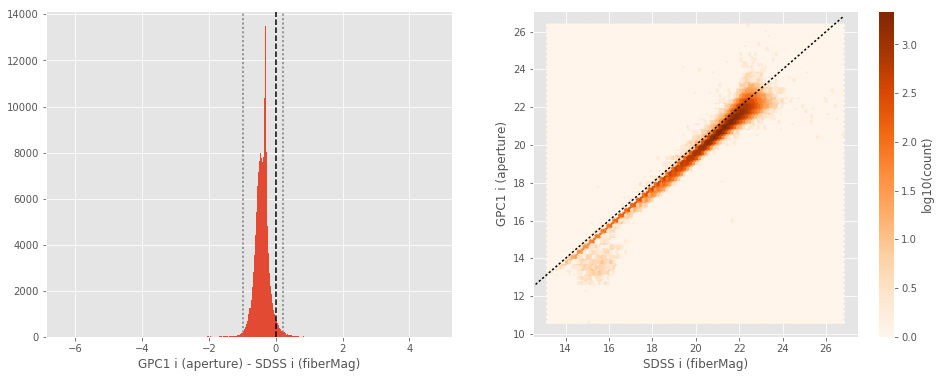

GPC1 i (total) - SDSS i (petroMag):
- Median: 0.05
- Median Absolute Deviation: 0.12
- 1% percentile: -2.2184738159179687
- 99% percentile: 0.8837654113769535


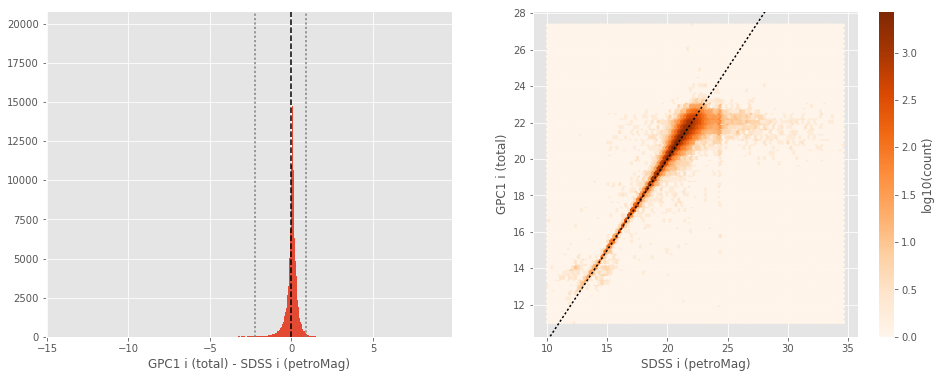

Mosaic i (aperture) - SDSS i (fiberMag):
- Median: -0.35
- Median Absolute Deviation: 0.17
- 1% percentile: -1.124779717590332
- 99% percentile: 0.9277369622192353


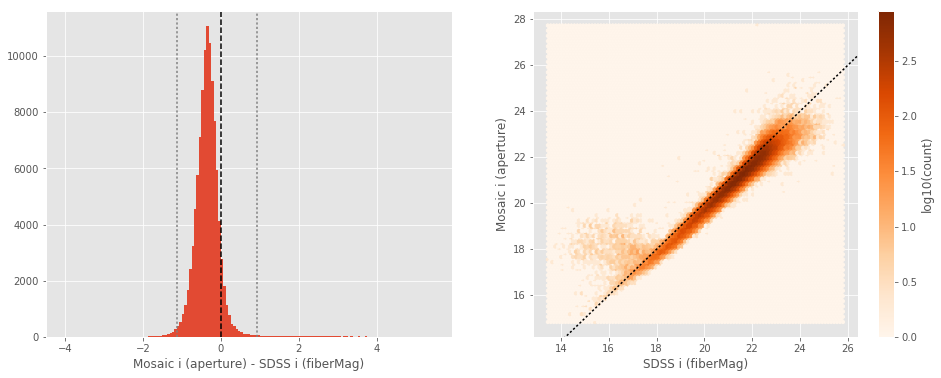

Mosaic i (total) - SDSS i (petroMag):
- Median: -0.64
- Median Absolute Deviation: 0.20
- 1% percentile: -4.404036397033691
- 99% percentile: 0.8486794779052738


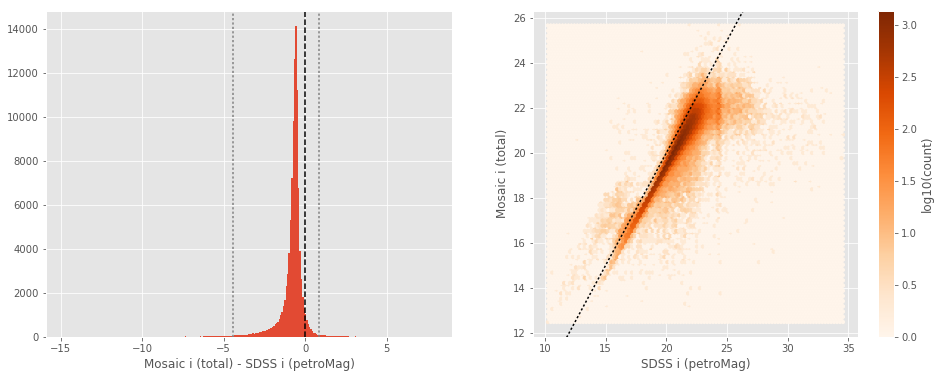

GPC1 z (aperture) - SDSS z (fiberMag):
- Median: -0.30
- Median Absolute Deviation: 0.18
- 1% percentile: -1.356192569732666
- 99% percentile: 0.9832890510559065


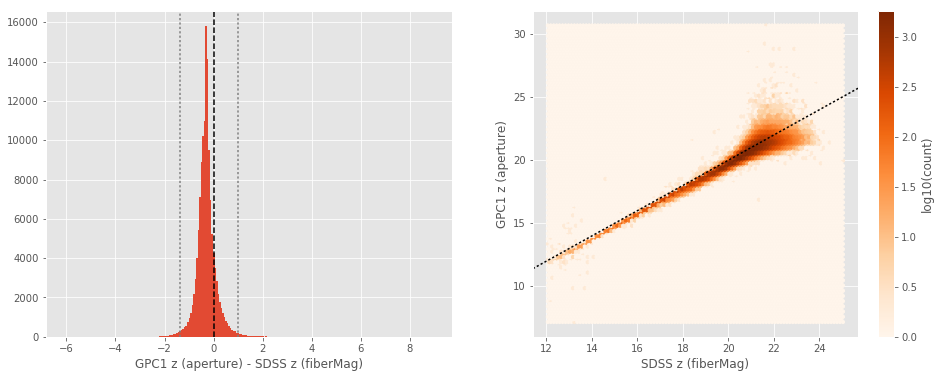

GPC1 z (total) - SDSS z (petroMag):
- Median: 0.13
- Median Absolute Deviation: 0.29
- 1% percentile: -3.4653361892700194
- 99% percentile: 1.7037193870544391


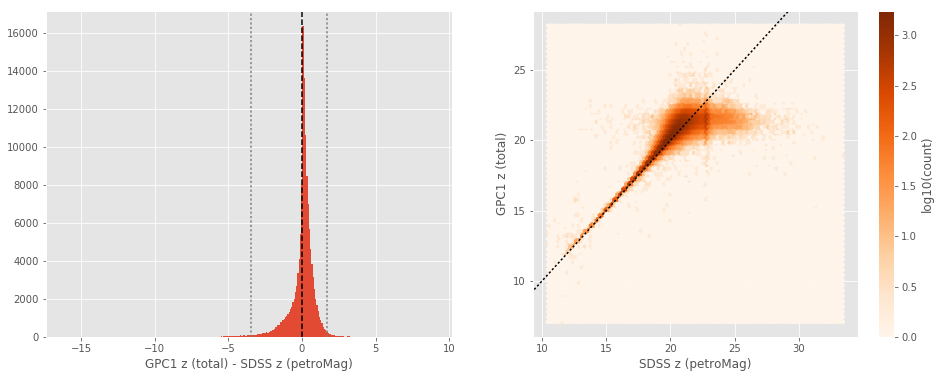

DECam z (aperture) - SDSS z (fiberMag):
- Median: -0.43
- Median Absolute Deviation: 0.18
- 1% percentile: -1.3969941902160645
- 99% percentile: 1.4390891933441154


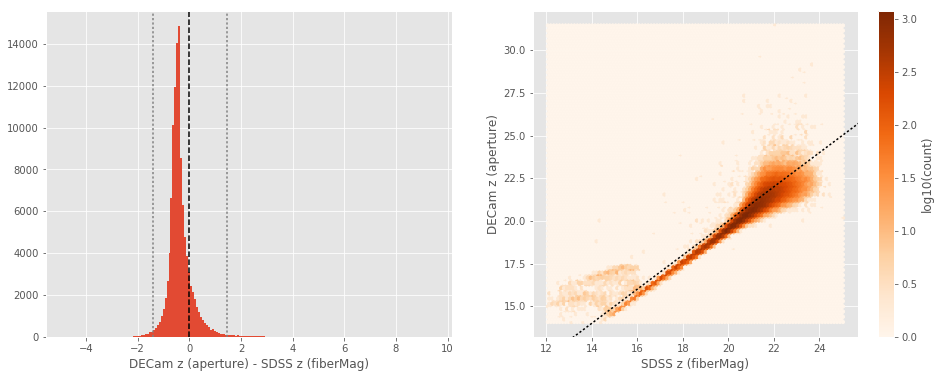

DECam z (total) - SDSS z (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.33
- 1% percentile: -3.6656150817871094
- 99% percentile: 1.9210266113281258


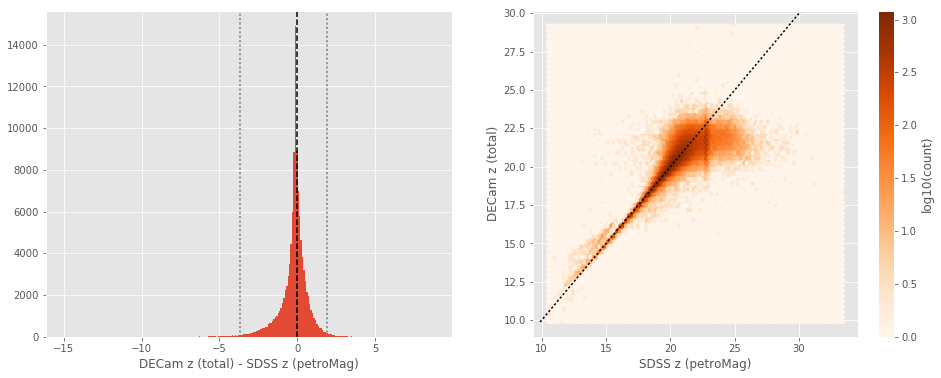

BASS z (aperture) - SDSS z (fiberMag):
- Median: -0.38
- Median Absolute Deviation: 0.21
- 1% percentile: -1.4236827850341798
- 99% percentile: 2.3649870300292894


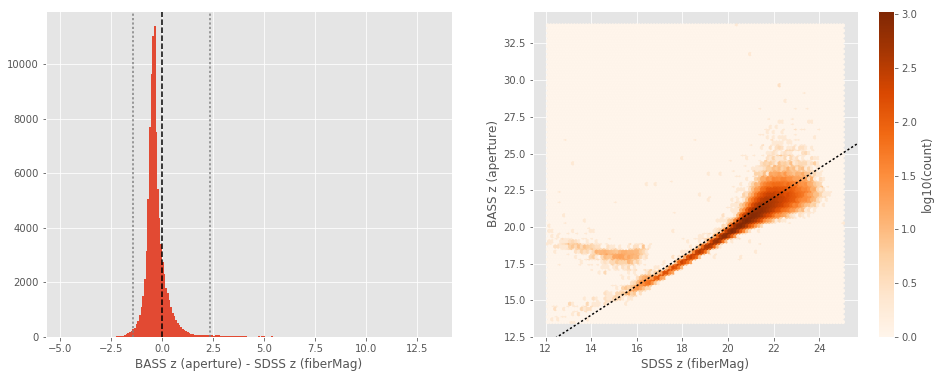

BASS z (total) - SDSS z (petroMag):
- Median: -0.11
- Median Absolute Deviation: 0.36
- 1% percentile: -3.8109129333496092
- 99% percentile: 2.0887960815429665


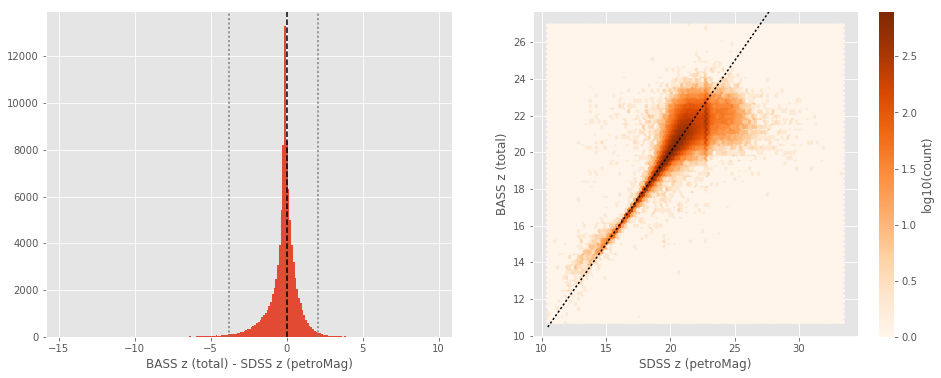

90prime z (aperture) - SDSS z (fiberMag):
- Median: 0.49
- Median Absolute Deviation: 0.21
- 1% percentile: -0.5331401062011718
- 99% percentile: 1.5899079895019539


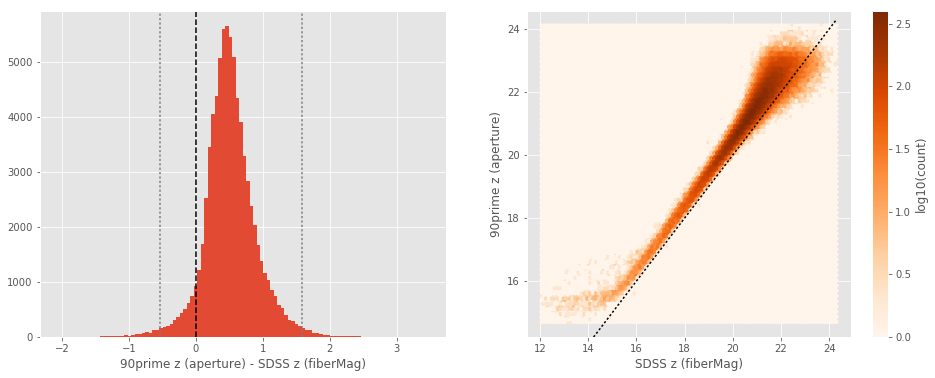

90prime z (total) - SDSS z (petroMag):
- Median: -0.05
- Median Absolute Deviation: 0.33
- 1% percentile: -3.625672569274902
- 99% percentile: 1.8136268615722657


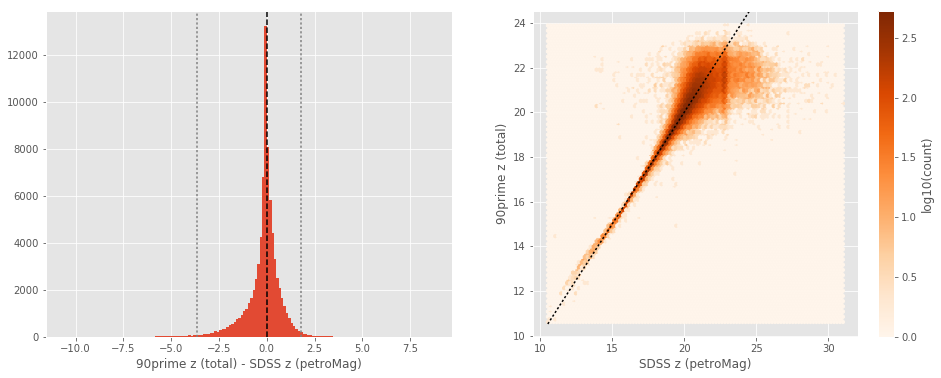

In [13]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_tot, master_cat_mag_tot,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. We compare the UKIDSS total J and K magnitudes to those from 2MASS.

The 2MASS magnitudes are “*Vega-like*” and we have to convert them to AB magnitudes using the zero points provided on [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4a.html):

| Band | Fν - 0 mag (Jy) |
|------|-----------------|
| J    | 1594            |
| H    | 1024            |
| Ks   | 666.7           |

In addition, UKIDSS uses a K band whereas 2MASS uses a Ks (“short”) band, [this page](http://www.ipac.caltech.edu/2mass/releases/allsky/doc/sec6_4b.html) give a correction to convert the K band in a Ks band with the formula:

$$K_{s(2MASS)} = K_{UKIRT} + 0.003 + 0.004 * (J−K)_{UKIRT}$$

In [14]:
# The AB zero point is 3631 Jy
j_2mass_to_ab = 2.5 * np.log10(3631/1595)
k_2mass_to_ab = 2.5 * np.log10(3631/666.7)

In [15]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_Bootes.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J:
- Median: 0.01
- Median Absolute Deviation: 0.07
- 1% percentile: -1.0741193592740834
- 99% percentile: 0.9443260482118769


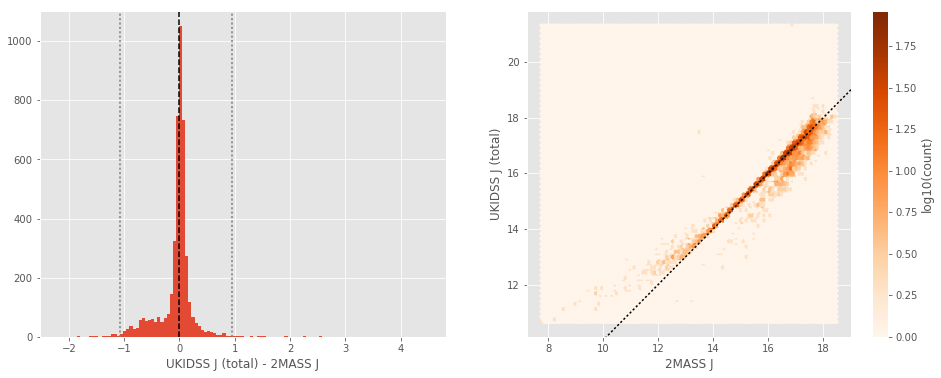

In [16]:
nb_compare_mags(twomass['jmag'] + j_2mass_to_ab, master_catalogue['m_newfirm_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

## Keeping only sources with good signal to noise ratio

From here, we are only comparing sources with a signal to noise ratio above 3, i.e. roughly we a magnitude error below 0.3.

*To make it easier, we are setting to NaN in the catalogue the magnitudes associated with an error above 0.3 so we can't use these magnitudes after the next cell.*

In [17]:
for error_column in [_ for _ in master_catalogue.colnames if _.startswith('merr_')]:
    column = error_column.replace("merr", "m")
    keep_mask = np.isfinite(master_catalogue[error_column])
    keep_mask[keep_mask] &= master_catalogue[keep_mask][error_column] <= 0.3
    master_catalogue[column][~keep_mask] = np.nan

## IV - Comparing aperture magnitudes to total ones.

Number of source used: 166865 / 3388482 (4.92%)


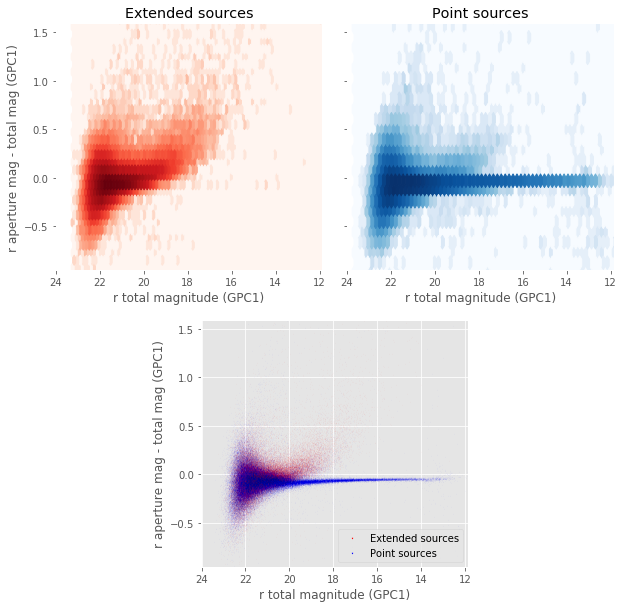

In [18]:
nb_ccplots(
    master_catalogue['m_gpc1_r'],
    master_catalogue['m_ap_gpc1_r'] - master_catalogue['m_gpc1_r'],
    "r total magnitude (GPC1)", "r aperture mag - total mag (GPC1)",
    master_catalogue["stellarity"],
    invert_x=True
)

## V - Color-color and magnitude-color plots

Number of source used: 91646 / 3388482 (2.70%)


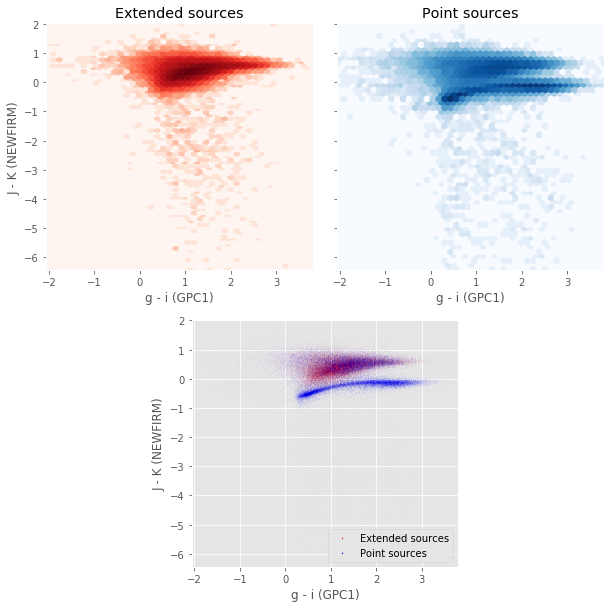

In [19]:
nb_ccplots(
    master_catalogue['m_gpc1_g'] - master_catalogue['m_gpc1_i'],
    master_catalogue['m_newfirm_j'] - master_catalogue['m_newfirm_k'],
    "g - i (GPC1)", "J - K (NEWFIRM)",
    master_catalogue["stellarity"]
)

Number of source used: 67924 / 3388482 (2.00%)


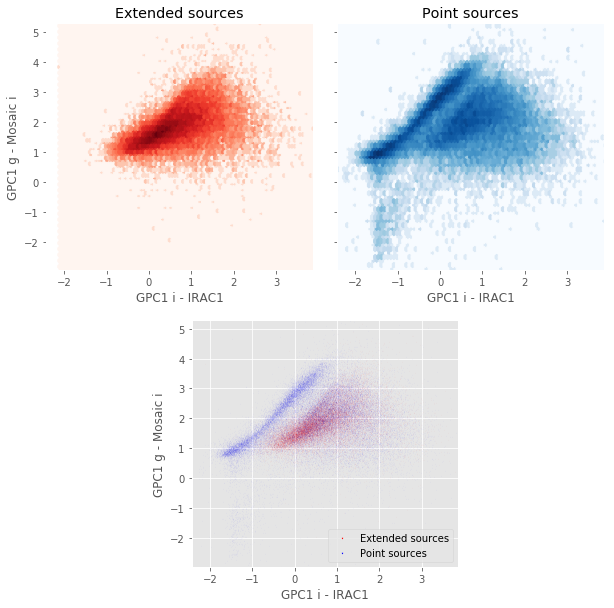

In [20]:
nb_ccplots(
    master_catalogue['m_gpc1_i'] - master_catalogue['m_irac_i1'],
    master_catalogue['m_gpc1_g'] - master_catalogue['m_mosaic_i'],
    "GPC1 i - IRAC1", "GPC1 g - Mosaic i",
    master_catalogue["stellarity"]
)

Number of source used: 175725 / 3388482 (5.19%)


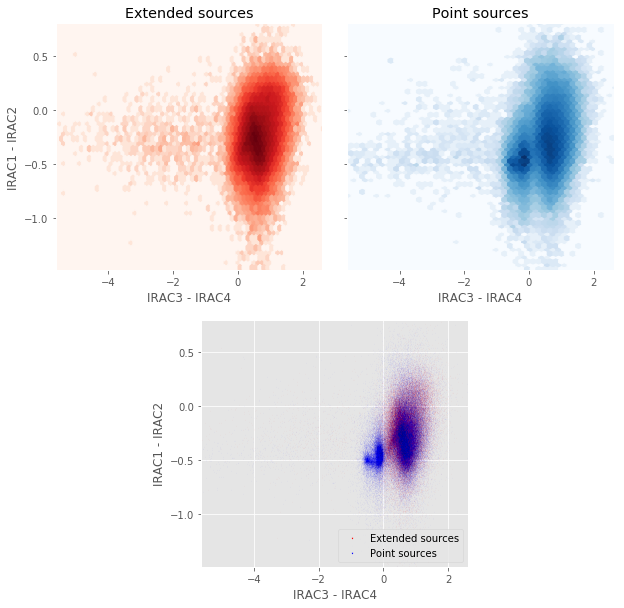

In [21]:
nb_ccplots(
    master_catalogue['m_newfirm_j'] - master_catalogue['m_newfirm_k'],
    master_catalogue['m_irac_i1'] - master_catalogue['m_irac_i2'],
    "IRAC3 - IRAC4", "IRAC1 - IRAC2",
    master_catalogue["stellarity"]
)